| **Inicio** | **atrás 1** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏪](./01_Guia_del_profesional_sobre_pruebas_estadisticas.ipynb)|

# **02 Proceso paso a paso para planificar una prueba A/B**

La planificación de una prueba A/B implica varios pasos críticos para asegurar que los resultados sean válidos, confiables y accionables. Aquí te guiaré a través de cada paso del proceso con detalles y ejemplos.

**Paso 1: Comience con una Hipótesis**

La hipótesis es una afirmación que predice un resultado basado en suposiciones. Debe ser específica y medible. Por ejemplo, "Cambiando el botón de 'Añadir al carrito' de azul a verde aumentará la tasa de conversión en un 5%".

**Paso 2: Obtenga una Línea de Base de Sus Métricas Actuales**

Antes de iniciar la prueba, es crucial entender el rendimiento actual. Si la tasa de conversión actual es del 10%, esta es tu línea de base.

**Paso 3: ¿Cuál es Para Usted un Tamaño de Efecto Significativo?**

El tamaño del efecto es la magnitud del cambio que es prácticamente significativo para su negocio, distinto del significado estadístico. En nuestro ejemplo, hemos definido previamente un aumento del 5% en la tasa de conversión como significativo.

**Paso 4: Realizar un Análisis de Potencia**

El análisis de potencia determina el tamaño de muestra necesario para detectar el efecto de un cierto tamaño con un nivel de confianza y potencia específicos. La "potencia" se refiere a la probabilidad de detectar un efecto si realmente existe. Generalmente, se busca una potencia de 0.8 o superior, lo que significa un 80% de probabilidad de detectar el efecto.

Para realizar un análisis de potencia, se pueden usar herramientas como G*Power o paquetes de software como `statsmodels` en Python. La fórmula general para calcular el tamaño de muestra en una prueba A/B para proporciones es:

$n = \left( \frac{Z_{\alpha/2} \sqrt{2 \bar{p} (1-\bar{p})} + Z_{\beta} \sqrt{p_0 (1-p_0) + p_1 (1-p_1)}}{p_1 - p_0} \right)^2$

donde:

- $(p_0)$ es la proporción en el grupo de control.

- $(p_1)$ es la proporción en el grupo experimental.

- $(\bar{p})$ es la proporción combinada.

- $(Z_{\alpha/2})$ es el valor z para el nivel de confianza deseado.

- $(Z_{\beta})$ es el valor z para la potencia deseada.

**Paso 5: Estimar la Duración del Experimento**

La duración del experimento depende del tráfico de su sitio web, la tasa de conversión actual y el tamaño de muestra necesario. Si su sitio recibe 10,000 visitantes por semana y necesita 5,000 visitantes por grupo, el experimento debería durar al menos 1 semana, asumiendo una distribución equitativa del tráfico entre los grupos.

**Paso 6: Discuta con Sus Partes Interesadas**

Antes de lanzar el experimento, discuta el plan, los posibles resultados y las acciones a seguir con todas las partes interesadas. Esto asegura que todos estén alineados y comprendan los objetivos y expectativas del experimento.

**Conclusión**

La prueba A/B es una herramienta poderosa para la toma de decisiones basada en datos. Un enfoque sistemático y metódico para la planificación y ejecución de la prueba es crucial para su éxito.

Ahora, vamos a crear un dataframe de ejemplo para ilustrar cómo se podría estimar el tamaño de muestra necesario para una prueba A/B dada una tasa de conversión base y un aumento esperado del 5%. Luego, mostraremos cómo se calcula este tamaño de muestra.

In [1]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Definir parámetros
p0 = 0.10  # Tasa de conversión actual (línea de base)
p1 = 0.105  # Tasa de conversión esperada con el cambio (10% + 5% de aumento)
alpha = 0.05  # Nivel de significancia
power = 0.8  # Potencia deseada

# Calcular el efecto
effect_size = proportion_effectsize(p0, p1)

# Calcular el tamaño de muestra necesario
power_analysis = NormalIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1)

sample_size

57755.63900543422

Para detectar un aumento del 5% en la tasa de conversión de un 10% a un 10.5%, con un nivel de significancia de 0.05 y una potencia de 0.8, necesitaríamos un tamaño de muestra de aproximadamente 57,756 observaciones por grupo en nuestra prueba A/B. Esto subraya la importancia de realizar un análisis de potencia antes de comenzar el experimento para asegurarse de que se disponga de suficientes datos para detectar el tamaño del efecto deseado de manera fiable.

Este cálculo proporciona una base sólida para la planificación del experimento, permitiéndole estimar la duración necesaria del experimento basándose en la tasa de adquisición de usuarios o visitantes y discutir estos detalles con las partes interesadas para alinear las expectativas y los recursos disponibles.

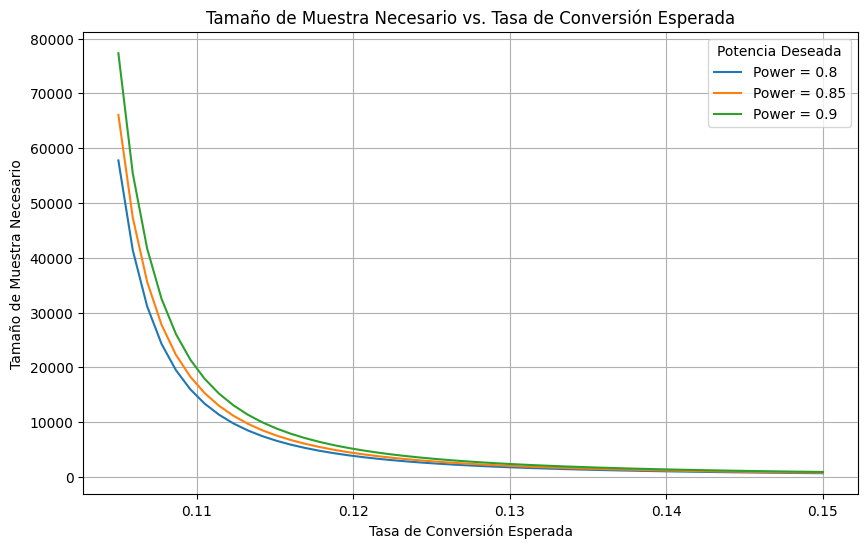

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Definir parámetros iniciales
p0 = 0.10  # Tasa de conversión actual (línea de base)
alpha = 0.05  # Nivel de significancia
powers = [0.8, 0.85, 0.9]  # Varias potencias deseada para visualizar
p1_values = np.linspace(0.105, 0.15, 50)  # Rango de tasas de conversión esperadas

# Crear un objeto para el análisis de potencia
power_analysis = NormalIndPower()

# Preparar el gráfico
plt.figure(figsize=(10, 6))

for power in powers:
    sample_sizes = []
    for p1 in p1_values:
        effect_size = proportion_effectsize(p0, p1)
        sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1)
        sample_sizes.append(sample_size)

    plt.plot(p1_values, sample_sizes, label=f'Power = {power}')

# Añadir detalles al gráfico
plt.title('Tamaño de Muestra Necesario vs. Tasa de Conversión Esperada')
plt.xlabel('Tasa de Conversión Esperada')
plt.ylabel('Tamaño de Muestra Necesario')
plt.legend(title='Potencia Deseada')
plt.grid(True)
plt.show()

| **Inicio** | **atrás 1** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏪](./01_Guia_del_profesional_sobre_pruebas_estadisticas.ipynb)|